# COMPARITIVE STUDY FOR DRIVER'S DROWSINESS DETECTION

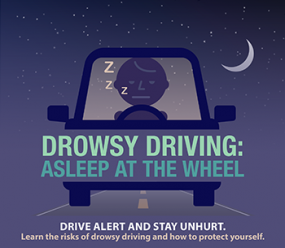

### Aim: 
    Our project aims at providing a solution for sleepness dtection while driver is on the wheel. As we know, sleeping while driving is very dangerous not only for the driver, but also for others. Neumerous accident cases have been reported due to the driver falling asleep while driving for maybe even a second. 

#### Project flow: 
    We have implemented our project using:
        1. Basic CNN model from scratch. 
        2. BasiC CNN model using inbuilt functions. 
        3. VGG 16 model using inbuilt functions. 
    Our project contains 5 ipynb files: 
        1. Basic CNN file that has implemetation from scratch
        2. BasiC CNN model using inbuilt functions
            2a. CNN code for training data
            2b. CNN code for the testing data 
        3.  VGG 16 model 
            3a. VGG16 code code for training data
            3b. VGG16 code code for testing data

### This file contains the code that will help us to test out CNN model built using keras. 

In [1]:
import cv2
import os
from keras.models import load_model
import numpy as np
from pygame import mixer
import time

pygame 2.1.2 (SDL 2.0.18, Python 3.8.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
mixer.init()
music_to_be_played = mixer.Sound('C:/Users/lakshman/Desktop/Group_9/Group_9/alarm.wav')
frontal_face = cv2.CascadeClassifier('C:/Users/lakshman/Desktop/Group_9/Group_9/haarcascade_frontalface_alt.xml')
left_eye = cv2.CascadeClassifier('C:/Users/lakshman/Desktop/Group_9/Group_9/haarcascade_lefteye_2splits.xml')
right_eye = cv2.CascadeClassifier('C:/Users/lakshman/Desktop/Group_9/Group_9/haarcascade_righteye_2splits.xml')
basic_cnn_model = load_model('C:/Users/lakshman/Desktop/Group_9/Group_9/drowsiness_detection.h5')
path = os.getcwd()
video_cap = cv2.VideoCapture(0)
font_name = cv2.FONT_HERSHEY_COMPLEX_SMALL
count=0
score=0
var=2
right_pred=[99]
left_pred=[99]

while(True):
    rectangle, draw = video_cap.read()
    hei,wid = draw.shape[:2] 

    gray = cv2.cvtColor(draw, cv2.COLOR_BGR2GRAY)
    
    faces = frontal_face.detectMultiScale(draw,minNeighbors=5,scaleFactor=1.1,minSize=(25,25))
    left_eyes = left_eye.detectMultiScale(draw)
    right_eyes =  right_eye.detectMultiScale(draw)

    cv2.rectangle(draw, (0,hei-50) , (200,hei) , (0,0,0) , thickness=cv2.FILLED )

    for (l,b,w,h) in faces:
        cv2.rectangle(draw, (l,b) , (l+w,b+h) , (100,100,100) , 1 )

    for (l,b,w,h) in right_eyes:
        right_eye_capture=draw[b:b+h,l:l+w]
        count=count+1
        right_eye_capture = cv2.cvtColor(right_eye_capture,cv2.COLOR_BGR2GRAY)
        right_eye_capture = cv2.resize(right_eye_capture,(256,256))
        right_eye_capture= right_eye_capture/255
        right_eye_capture=  right_eye_capture.reshape(256,256,-1)
        right_eye_capture = np.expand_dims(right_eye_capture,axis=0)
        right_pred_1 = basic_cnn_model.predict(right_eye_capture)
        print("*******************************************************************************")
        print(right_pred_1)
        class_labels=['Closed','Open']
        right_pred = class_labels[right_pred_1.argmax()]
        print("*******************************************************************************")
        print(right_pred)
        if(right_pred=='Open'):
            class_labels='Open' 
        if(right_pred=='Closed'):
            class_labels='Closed'
        break

    for (l,b,w,h) in left_eyes:
        left_eye_capture=draw[b:b+h,l:l+w]
        count=count+1
        left_eye_capture = cv2.cvtColor(left_eye_capture,cv2.COLOR_BGR2GRAY)  
        left_eye_capture = cv2.resize(left_eye_capture,(256,256))
        left_eye_capture= left_eye_capture/255
        left_eye_capture=left_eye_capture.reshape(256,256,-1)
        left_eye_capture = np.expand_dims(left_eye_capture,axis=0)
        left_pred_1 = basic_cnn_model.predict(left_eye_capture)

        print("----------------------------------------------------------------------------------")
        print(left_pred_1)
        class_labels=['Closed','Open']
        left_pred = class_labels[left_pred_1.argmax()]
        print("----------------------------------------------------------------------------------")
        print(left_pred)
        if(left_pred=='Open'):
            class_labels='Open' 
        if(left_pred=='Closed'):
            class_labels='Closed' 
        break
    if(right_pred=='Closed' and left_pred =='Closed'):
        score=score+1
        cv2.putText(draw,"Closed",(10,hei-20), font_name, 1,(255,255,255),1,cv2.LINE_AA)
    else:
        score=score-1
        cv2.putText(draw,"Open",(10,hei-20), font_name, 1,(255,255,255),1,cv2.LINE_AA)
    
        
    if(score<0):
        score=0   
    cv2.putText(draw,'Score:'+str(score),(100,hei-20), font_name, 1,(255,255,255),1,cv2.LINE_AA)
    if(score>15):
        cv2.imwrite(os.path.join(path,'image.jpg'),draw)
        try:
            music_to_be_played.play()
        except: 
            pass
        if(var<16):
            var= var+2
        else:
            var=var-2
            if(var<2):
                var=2
        cv2.rectangle(draw,(0,0),(wid,hei),(0,0,255),var) 
    cv2.imshow('draw',draw)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
video_cap.release()
cv2.destroyAllWindows()


----------------------------------------------------------------------------------
[[0.52324885 0.47675115]]
----------------------------------------------------------------------------------
Closed
*******************************************************************************
[[0.41272652 0.58727354]]
*******************************************************************************
Open
----------------------------------------------------------------------------------
[[0.31946206 0.680538  ]]
----------------------------------------------------------------------------------
Open
*******************************************************************************
[[0.757278   0.24272193]]
*******************************************************************************
Closed
----------------------------------------------------------------------------------
[[0.7649672  0.23503281]]
----------------------------------------------------------------------------------
Closed
*********************

*******************************************************************************
[[0.77440107 0.22559898]]
*******************************************************************************
Closed
----------------------------------------------------------------------------------
[[0.78459543 0.21540454]]
----------------------------------------------------------------------------------
Closed
*******************************************************************************
[[0.72649914 0.27350086]]
*******************************************************************************
Closed
----------------------------------------------------------------------------------
[[0.4651608 0.5348392]]
----------------------------------------------------------------------------------
Open
*******************************************************************************
[[0.3156294 0.6843706]]
*******************************************************************************
Open
-------------------------------

KeyboardInterrupt: 